In [0]:
import pandas as pd

journal_data = pd.read_csv('C:/Users/ashukl6/Downloads/finaldata1.csv', sep='::')
journal_data.head()

C:\Users\ashukl6\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Sentence Description,Category
0,Frozen sections of various green fluorescent p...,method
1,"For example , the film method is useful for ch...",method
2,"Specifically , Kawamoto and Shimizu recommend ...",method
3,"Recently , Sado et al. introduced a novel way ...",method
4,These considerations led us to explore an impr...,method


In [0]:
journal_data['Sentence Description'] = journal_data['Sentence Description'].str.replace("\r", " ")
journal_data['Sentence Description'] = journal_data['Sentence Description'].str.replace("\n", " ")
journal_data['Sentence Description'] = journal_data['Sentence Description'].str.replace("    ", " ")

journal_data['Sentence Description'] = journal_data['Sentence Description'].str.replace('"', '')
journal_data['Sentence Description'] = journal_data['Sentence Description'].str.lower()

punctuation_signs = list("?:!.,;")

for punct_sign in punctuation_signs:
    journal_data['Sentence Description'] = journal_data['Sentence Description'].str.replace(punct_sign, '')
    
journal_data['Sentence Description'] = journal_data['Sentence Description'].str.replace("'s", "")

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
print("------------------------------------------------------------")
nltk.download('wordnet')

wordnet_lemmatizer = WordNetLemmatizer()


nrows = len(journal_data)
lemmatized_text_list = []

for row in range(0, nrows):
    
    # Create an empty list containing lemmatized words
    lemmatized_list = []
    
    # Save the text and its words into an object
    text = journal_data.loc[row]['Sentence Description']
    text_words = text.split(" ")

    # Iterate through every word to lemmatize
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        
    # Join the list
    lemmatized_text = " ".join(lemmatized_list)
    
    # Append to the list containing the texts
    lemmatized_text_list.append(lemmatized_text)
    


journal_data['Sentence Description'] = lemmatized_text_list

journal_data.head()

# Downloading the stop words list
nltk.download('stopwords')

stop_words = list(stopwords.words('english'))

for stop_word in stop_words:

    regex_stopword = r"\b" + stop_word + r"\b"
    journal_data['Sentence Description'] = journal_data['Sentence Description'].str.replace(regex_stopword, '')
    

journal_data.head()    


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ashukl6\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
------------------------------------------------------------
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ashukl6\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashukl6\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Sentence Description,Category
0,freeze section various green fluorescent prot...,method
1,example film method useful chase donor ce...,method
2,specifically kawamoto shimizu recommend 5- ...,method
3,recently sado et al introduce novel way pro...,method
4,considerations lead us explore improve meth...,method


In [0]:
journal_data["Category"].value_counts()

conclusion    7171
method        7171
result        7171
Name: Category, dtype: int64

In [0]:
from sklearn.utils import resample

In [0]:
# Separate majority and minority classes
df_majority = journal_data[journal_data.Category=="result"]
df_minority = journal_data[journal_data.Category=="method"]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=7171,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.Category.value_counts()

method    7171
result    7171
Name: Category, dtype: int64

In [0]:
df_downsampled.head()

,Sentence Description,Category
1044,furthermore response hgpi539-558 -synthe...,result
21881,fly contain eyeless-gal4 driver cross line...,result
7273,three hedgehog ( hh ) proteins function bind...,result
8105,since greater 90 % cells cell line test p...,result
14107,addition expression level atp synthase comp...,result


In [0]:
df_minority = journal_data[journal_data.Category=="conclusion"]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample without replacement
                                 n_samples=7171,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_minority_upsampled, df_downsampled])
 
# Display new class counts
df_downsampled.Category.value_counts()

conclusion    7171
method        7171
result        7171
Name: Category, dtype: int64

In [0]:
journal_data = df_downsampled

In [0]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
journal_data["Category_code"] = lb_make.fit_transform(journal_data["Category"])

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(journal_data['Sentence Description'], 
                                                    journal_data['Category_code'], 
                                                    test_size=0.15, 
                                                    random_state=8)


In [0]:
from tensorflow.python.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

In [0]:
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[0, :])


[ 502   11 1066 1297    2 1033 3024 1297 4416 2009 4913  172   86   65
 1701    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [0]:
from tensorflow.python.keras.utils import np_utils

ytrain = np_utils.to_categorical(y_train)
ytest =  np_utils.to_categorical(y_test)

In [0]:
print(X_train[6000])


[4895 2424  691  405   39 4399    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [0]:
# # embedding_dim = 50
# # embedding_matrix = create_embedding_matrix(
# #      'C:/Users/ashukl6/Downloads/bio_embedding_extrinsic',
# #      tokenizer.word_index, embedding_dim)

# from gensim.models import FastText
# model = FastText.load_fasttext_format('C:/Users/ashukl6/Downloads/bio_embedding_extrinsic')

from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('C:/Users/ashukl6/Downloads/bio_embedding_extrinsic', binary=True)

In [0]:
# import numpy as np

# def create_embedding_matrix(filepath, word_index, embedding_dim):
#     vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
#     embedding_matrix = np.zeros((vocab_size, embedding_dim))

#     with open(filepath, 'rb') as f:
#         for line in f:
#             print(line) 
#             word, *vector = line.split()
#             if word in word_index:
#                 idx = word_index[word] 
#                 embedding_matrix[idx] = np.array(
#                     vector, dtype=np.float32)[:embedding_dim]

#     return embedding_matrix

In [0]:
len(tokenizer.word_index)

23375

In [0]:
import numpy as np
embedding_dim=200
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, embedding_dim))
        
for word, i in tokenizer.word_index.items():
    try:
        embedding_vector = model[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),embedding_dim)
                

In [0]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras import layers
from tensorflow.python.keras.wrappers.scikit_learn import KerasClassifier

#input_dim = features_train.shape[1]

# define baseline model
#def baseline_model():
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
model.add(layers.GlobalMaxPool1D())
#model.add(layers.Dense(5, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(5,  activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)  
  


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
history = model.fit(X_train,ytrain,epochs=10,batch_size=10,validation_data=[X_test,ytest])

Train on 18286 samples, validate on 3227 samples
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/10
18286/18286 [==============================] - 71s 4ms/sample - loss: 0.6947 - acc: 0.6810 - val_loss: 0.4425 - val_acc: 0.8125
Epoch 2/10
18286/18286 [==============================] - 71s 4ms/sample - loss: 0.3157 - acc: 0.8782 - val_loss: 0.3698 - val_acc: 0.8336
Epoch 3/10
18286/18286 [==============================] - 71s 4ms/sample - loss: 0.1951 - acc: 0.9294 - val_loss: 0.3938 - val_acc: 0.8379
Epoch 4/10
18286/18286 [==============================] - 72s 4ms/sample - loss: 0.1109 - acc: 0.9665 - val_loss: 0.4681 - val_acc: 0.8385
Epoch 5/10
18286/18286 [==============================] - 71s 4ms/sample - loss: 0.0498 - acc: 0.9892 - val_loss: 0.5641 - val_acc: 0.8305
Epoch 6/10
18286/18286 [==============================] - 72s 4ms/sample - loss: 0.0208 - acc: 0.9963 - val_loss: 0.6736 - val_acc

In [0]:
loss, accuracy = model.evaluate(X_train, ytrain, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, ytest, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))



Training Accuracy: 0.9999
Testing Accuracy:  0.8293


In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

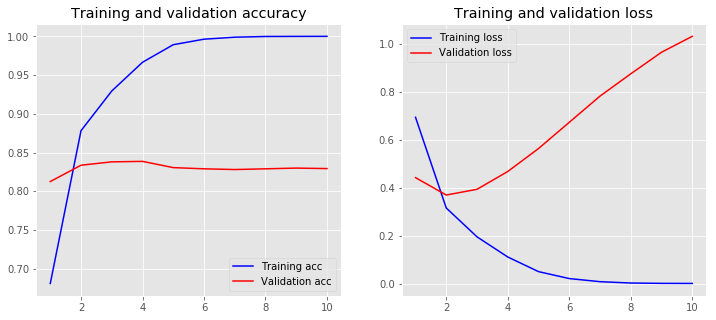

In [0]:
plot_history(history)